<a href="https://colab.research.google.com/github/andreunilux/BSP_6/blob/main/Analyse_and_Visualize_gold_context_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install missing dependancies
!pip install transformers accelerate
!pip install wordcloud
!pip install bcolors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Pandas Dataframe Library
import json
import pandas as pd
import os
from IPython.display import display
import numpy as np 
from google.colab import drive


# Graphs and Charts
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns

# Mount Google Drive
drive.mount('/content/drive')

# needed for tokenization
from transformers import AutoTokenizer, BertConfig, BertTokenizer
current_model="bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(current_model, do_lower_case=True)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from IPython.core.interactiveshell import dis




def overview_data(dataset):
  print("Look at example representative entries of the dataset")
  display(dataset.head(2))
  print("")
  
  if(dataset.isnull().values.any()):
    print("Dataset is not complete. Values are missing")
  else:
    print("Dataset complete")
  
  
  
  if(dataset.duplicated().any()):
    print("Duplicates Found. Duplicates removed.")
    dataset.drop_duplicates
  else:
    print("No Duplicates")

  print("How many values are in each column of the dataset?")
  display(dataset.count())
  print("")
  print("How balanced is the dataset?")
  display(dataset.label.value_counts(normalize=True))
  print("")


def visualize_overview_dataset(dataset):
  print("Look at example representative entries of the dataset")
  display(dataset.head(2))
  
  plt.title("All Samples (context+target) organized by Labels")
  ax= dataset.sort_values("label")["label"].value_counts(sort=False).plot(kind='bar', figsize=(10,10),color=['red','black','green'])
  plt.xlabel("Samples")
  plt.ylabel("Number of Samples ")
  ax.bar_label(ax.containers[0], label_type='edge')
  red_patch = mpatches.Patch(color='red', label='Hate Speech')
  black_patch = mpatches.Patch(color='black', label='Neutral Speech')
  green_patch = mpatches.Patch(color='green', label='Counter Hate Speech')
  plt.legend(handles=[red_patch, black_patch, green_patch ])
  plt.show


def wordcloud_target(dataset):
  wordcloud = WordCloud().generate(' '.join(dataset['target']))
  # Generate plot
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()
  
def wordcloud_context(dataset):
  wordcloud = WordCloud().generate(' '.join(dataset['context']))
  # Generate plot
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()



def add_tokenization_encoding(dataset):
  tokens_c=[] # tokenization of the context sentences
  token_ids_c=[]  # tokenization ids or encoding of the context sentences
  length_of_token_ids_c=[] # length of the tokenization of the context sentences

  for sent in dataset.context:
    tokens = tokenizer.tokenize(sent)
    input_ids = tokenizer.encode(sent,add_special_tokens=True)
    tokens_c.append(tokens)
    token_ids_c.append(input_ids)
    length_of_token_ids_c.append(len(input_ids))
  dataset['tokens_c']= tokens_c  
  dataset['token_ids_c']= token_ids_c   
  dataset['length_of_token_ids_c']= length_of_token_ids_c 
  
 
  tokens_t=[] # tokenization of the target sentences
  token_ids_t=[]  # tokenization ids of encoding of the target sentences
  length_of_token_ids_t=[] # length of the tokenization of the target sentences

  for sent in dataset.target:
    tokens = tokenizer.tokenize(sent)
    input_ids = tokenizer.encode(sent,add_special_tokens=True)
    tokens_t.append(tokens)
    token_ids_t.append(input_ids)
    length_of_token_ids_t.append(len(input_ids))
  dataset['tokens_t']= tokens_t  
  dataset['token_ids_t']= token_ids_t   
  dataset['length_of_token_ids_t']= length_of_token_ids_t 
  



  tokens_ct=[] # tokenization of the context and target sentences
  token_ids_ct=[]  # tokenization ids of encoding of the context and target sentences
  length_of_token_ids_ct=[] # length of the tokenization of the context and target sentences

  for sent in dataset.context+dataset.target:
    tokens = tokenizer.tokenize(sent)
    input_ids = tokenizer.encode(sent,add_special_tokens=True)
    tokens_ct.append(tokens)
    token_ids_ct.append(input_ids)
    length_of_token_ids_ct.append(len(input_ids))
  dataset['tokens_ct']= tokens_ct  
  dataset['token_ids_ct']= token_ids_ct   
  dataset['length_of_token_ids_ct']= length_of_token_ids_ct 
  

def overview_tokenization(dataset):
  add_tokenization_encoding(dataset)
  display(dataset['length_of_token_ids_c'].describe([.25,.5,.75,0.8,0.95,0.99]))
  display(dataset['length_of_token_ids_t'].describe([.25,.5,.75,0.8,0.95,0.99]))
  display(dataset['length_of_token_ids_ct'].describe([.25,.5,.75,0.8,0.95,0.99]))
  print("")
  if(int(dataset['length_of_token_ids_ct'].max())>512):
    print("Sequence length is longer than the specified maximum sequence length (512) ")
    display(dataset.query('length_of_token_ids_ct > 512'))


def show_dataset_pie(l_train,l_val,l_test):
  labels = ['train.json', 'val.json', 'test.json']
  sizes = [l_train,l_val,l_test]

  fig = plt.figure(figsize =(10, 7))
  plt.title("Dataset split \n train:")
  plot0=plt.pie(sizes, labels=labels,autopct='%1.1f%%')
  for i in range(len(sizes)):
    print(labels[i]+": "+str(sizes[i]))
  print("all entries in the dataset: "+str(sum(sizes)))

# Overview and Analysation of the given Dataset

The topic of my BSP 6 is about Hate speech detection on social media content. Of course social media content can be defined as pretty much anything you share on social media. This includes different mediums or formats to share information such as videos, pictures, audio files and text. In this project I will mainly focus on linguistic information so textual information. Collecting data and summarizing the collected data in a dataset used for machine learning  is always a difficult and very time consuming task and can be very costly too. So I decided to take an existing dataset form the paper "Hate Speech and Counter Hate Speech Detection: Conversational Context Matter". The dataset contains 6,846 Reddit comments, which come pair wise. The first comment (parent) is always followed by the second comment (target), which should be the comment, that the machine learning model classifies into Hate, Neutral and Counter Hate. The dataset comes with labels and thus this is supervised learning. Anyway let's start analysing the dataset. 


The dataset is divided into 2 folders silver and gold:

1.   Gold Folder (4,751 entries):

*   train.json (3325 entries)
*   val.json (713 entries) 
*   test.json (713 entries)

2.   Silver Folder (2.094 entries):

*   train.json (1675 entries)
*   val.json (419 entries) 


Let's start by looking in detail at the gold folder of the dataset.


In [ ]:
gold='/content/drive/MyDrive/BSP6/init_dataset_gold'  #intial gold dataset 
silver='/content/drive/MyDrive/BSP6/init_dataset_silver' #intial silver dataset
gold_silver='/content/drive/MyDrive/BSP6/init_dataset_gold_silver' #gold and silver merged for train and val | gold for test
gold_silver_train_gold_val='/content/drive/MyDrive/BSP6/init_dataset_gold_silver_train_gold_val' #gold and silver merged for train |  gold for val and test

os.chdir(gold) 
dirs = os.listdir(gold)
for file in dirs:
   print(file)

train_data = pd.read_json('train.json', lines=True)
val_data = pd.read_json('val.json', lines=True)
test_data = pd.read_json('test.json', lines=True)


test.json
train.json
val.json


train.json: 3325
val.json: 713
test.json: 713
all entries in the dataset: 4751


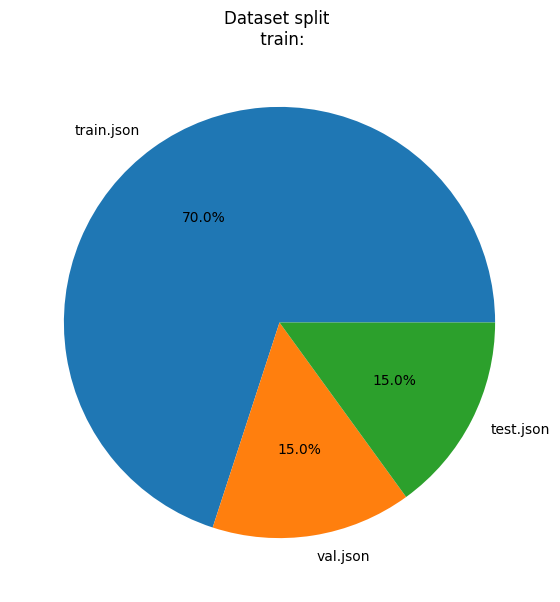

In [ ]:
l_train=len(train_data)
l_val=len(val_data)
l_test=len(test_data)
show_dataset_pie(l_train,l_val,l_test)

Now I want to see how an overview over the different sets. 

In [ ]:
display(train_data.head(),val_data.head(),test_data.head())

,idx,label,context,target
0,0,2,The UK is fucked.,>The ~~UK~~ world is fucked FTFY
1,1,0,Listen to this wisdom.,Where the Fuck did you get that up arrow?
2,2,1,"""That's different.""",You're right. The ultrasound says it's a girl....
3,3,2,"Oh fuck offffff, this is just patently untrue ...",Lol you can always spot a valid arguement when...
4,4,2,This whole sub should come to terms with reali...,I stopped reading your history after you wante...


,idx,label,context,target
0,0,2,The fact that you think that is sufficient for...,Not being able to find a job for 20 years soun...
1,1,2,Because it's not true you fucking liar. Not ev...,Can't handle the truth hmmmm?
2,2,1,"What about the meme ""lol male tears""?",Male tears is spunk lmfao
3,3,1,This is not a feminist issue but a capitalist ...,Exactly what part of this is a capitalist issue?
4,4,0,i think her view has some validity though? man...,You are the part of the problem.


,idx,label,context,target
0,0,2,Someone on Tumblr actually complied a list and...,Can I get a link to that?
1,1,1,"She has no trouble using Feminism to help her,...",Rand Paul thinks so too. Maybe you should vote...
2,2,1,It varies from state to state but generally sp...,Here in Florida we have the Romeo and Juliet ...
3,3,1,You are literally using it as meme. How can yo...,Seriously OP is a moron for multiple reasons.
4,4,0,You wish. You damn well know Schumer is gorgin...,*There's always those people that she literall...


Look at example representative entries of the dataset


,idx,label,context,target
0,0,2,The UK is fucked.,>The ~~UK~~ world is fucked FTFY
1,1,0,Listen to this wisdom.,Where the Fuck did you get that up arrow?



Dataset complete
No Duplicates
How many values are in each column of the dataset?


idx        3325
label      3325
context    3325
target     3325
dtype: int64


How balanced is the dataset?


1    0.489323
0    0.277293
2    0.233383
Name: label, dtype: float64


Look at example representative entries of the dataset


,idx,label,context,target
0,0,2,The UK is fucked.,>The ~~UK~~ world is fucked FTFY
1,1,0,Listen to this wisdom.,Where the Fuck did you get that up arrow?


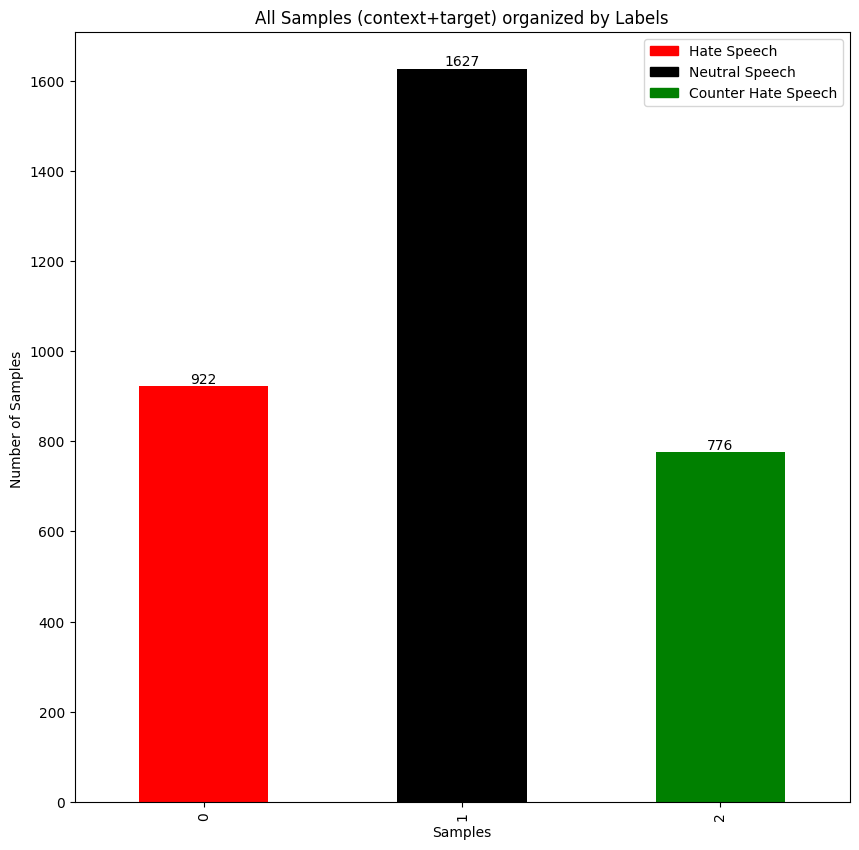

In [ ]:
# 0 = Hate
# 1 = Neutral
# 2 = Counter Hate

overview_data(train_data)
visualize_overview_dataset(train_data)

Look at example representative entries of the dataset


,idx,label,context,target
0,0,2,The fact that you think that is sufficient for...,Not being able to find a job for 20 years soun...
1,1,2,Because it's not true you fucking liar. Not ev...,Can't handle the truth hmmmm?



Dataset complete
No Duplicates
How many values are in each column of the dataset?


idx        713
label      713
context    713
target     713
dtype: int64


How balanced is the dataset?


1    0.499299
0    0.283310
2    0.217391
Name: label, dtype: float64


Look at example representative entries of the dataset


,idx,label,context,target
0,0,2,The fact that you think that is sufficient for...,Not being able to find a job for 20 years soun...
1,1,2,Because it's not true you fucking liar. Not ev...,Can't handle the truth hmmmm?


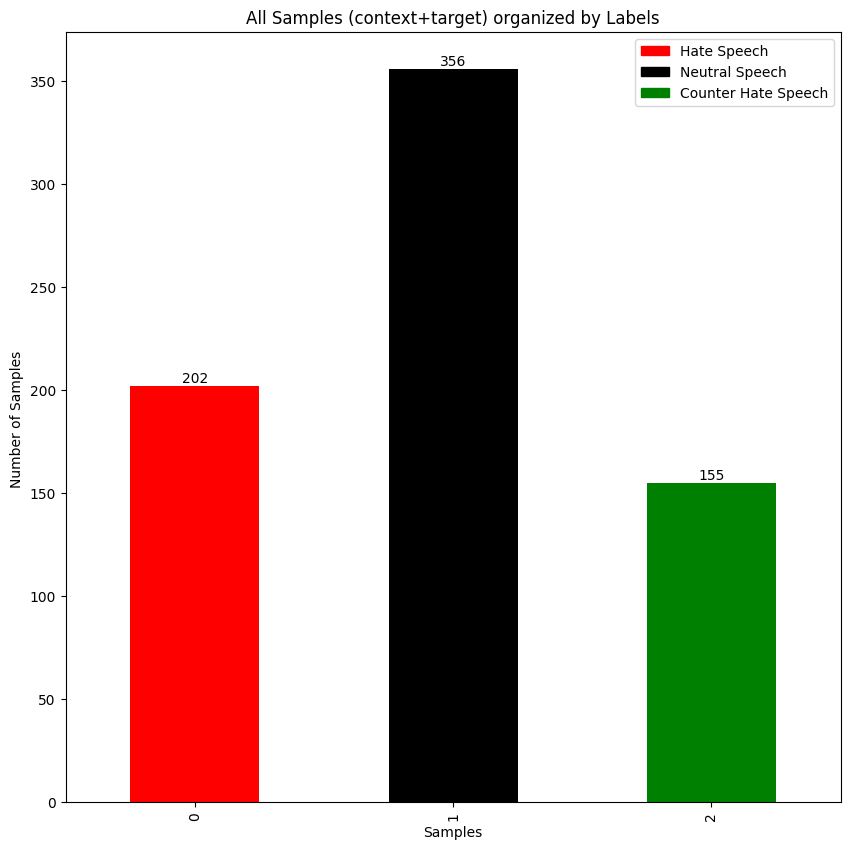

In [ ]:
overview_data(val_data)
visualize_overview_dataset(val_data)

Look at example representative entries of the dataset


,idx,label,context,target
0,0,2,Someone on Tumblr actually complied a list and...,Can I get a link to that?
1,1,1,"She has no trouble using Feminism to help her,...",Rand Paul thinks so too. Maybe you should vote...



Dataset complete
No Duplicates
How many values are in each column of the dataset?


idx        713
label      713
context    713
target     713
dtype: int64


How balanced is the dataset?


1    0.506311
0    0.258065
2    0.235624
Name: label, dtype: float64


Look at example representative entries of the dataset


,idx,label,context,target
0,0,2,Someone on Tumblr actually complied a list and...,Can I get a link to that?
1,1,1,"She has no trouble using Feminism to help her,...",Rand Paul thinks so too. Maybe you should vote...


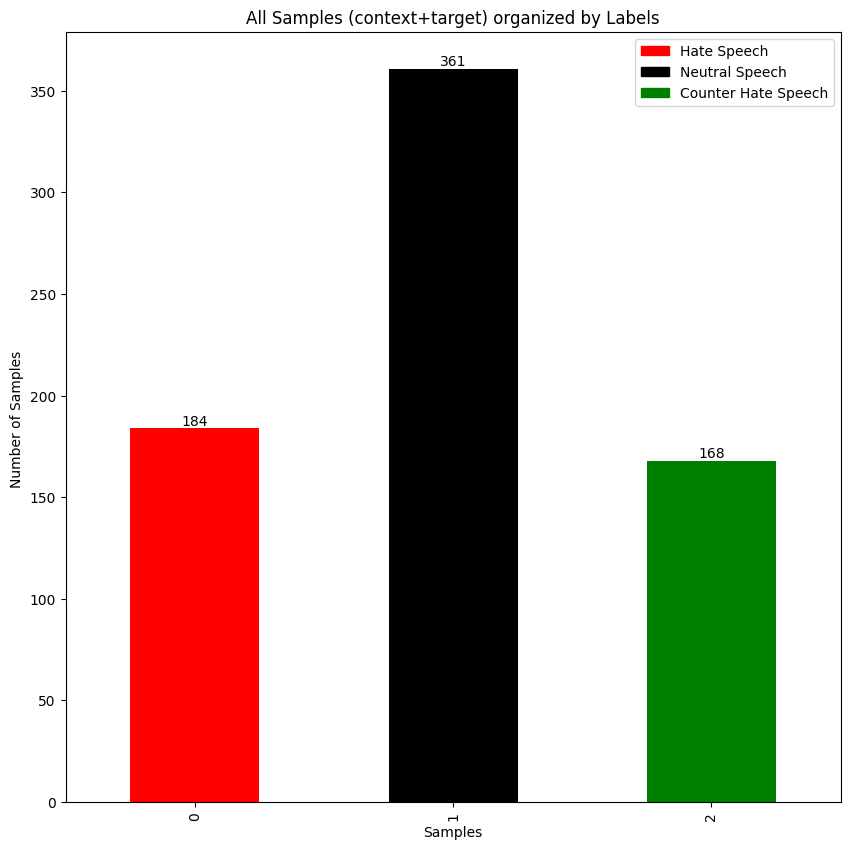

In [ ]:
overview_data(test_data)
visualize_overview_dataset(test_data)

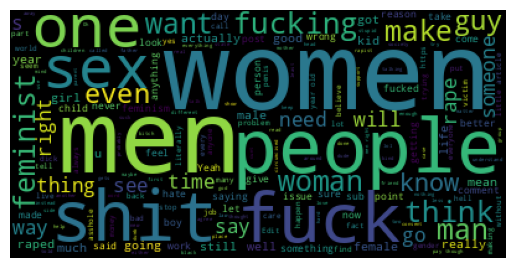

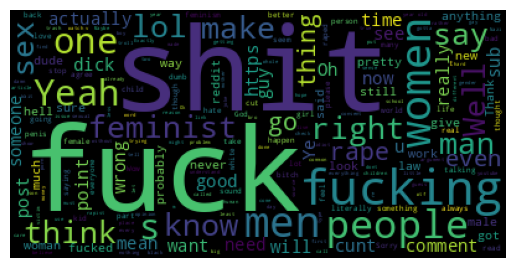

In [ ]:
wordcloud_context(train_data)
wordcloud_target(train_data)

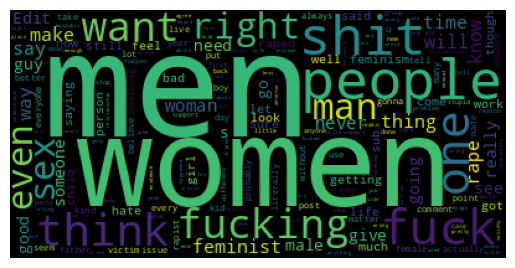

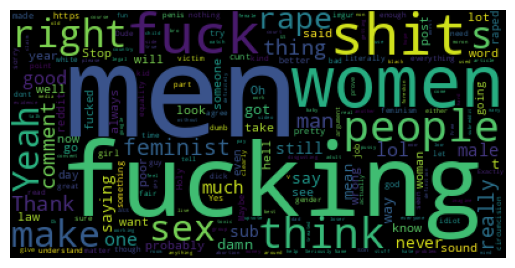

In [ ]:
wordcloud_context(val_data)
wordcloud_target(val_data)

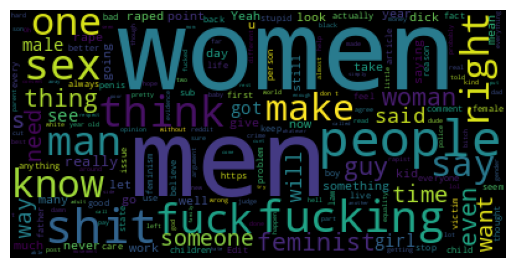

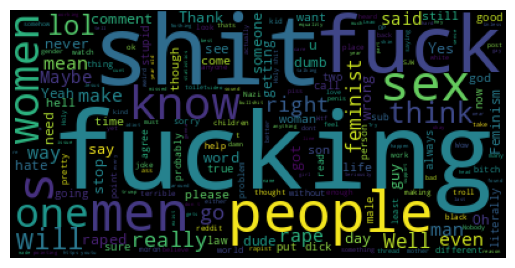

In [ ]:
wordcloud_context(test_data)
wordcloud_target(test_data)

In [ ]:
overview_tokenization(train_data)

count    3325.000000
mean       58.373233
std        48.147624
min         7.000000
25%        24.000000
50%        43.000000
75%        77.000000
80%        88.000000
95%       165.800000
99%       203.000000
max       640.000000
Name: length_of_token_ids_c, dtype: float64

count    3325.000000
mean       16.517594
std         7.609138
min         7.000000
25%        12.000000
50%        16.000000
75%        20.000000
80%        21.000000
95%        25.000000
99%        43.000000
max       191.000000
Name: length_of_token_ids_t, dtype: float64

count    3325.000000
mean       72.953985
std        49.128371
min        14.000000
25%        38.000000
50%        58.000000
75%        92.000000
80%       103.000000
95%       180.000000
99%       221.760000
max       655.000000
Name: length_of_token_ids_ct, dtype: float64


Sequence length is longer than the specified maximum sequence length (512) 


,idx,label,context,target,tokens_c,token_ids_c,length_of_token_ids_c,tokens_t,token_ids_t,length_of_token_ids_t,tokens_ct,token_ids_ct,length_of_token_ids_ct
932,932,1,^^Note: ^^The ^^vast ^^majority ^^of ^^these ^...,"Yeah, this aint gonna fit in a tweet...","[^, ^, note, :, ^, ^, the, ^, ^, vast, ^, ^, m...","[101, 1034, 1034, 3602, 1024, 1034, 1034, 1996...",640,"[yeah, ,, this, ain, ##t, gonna, fit, in, a, t...","[101, 3398, 1010, 2023, 7110, 2102, 6069, 4906...",17,"[^, ^, note, :, ^, ^, the, ^, ^, vast, ^, ^, m...","[101, 1034, 1034, 3602, 1024, 1034, 1034, 1996...",655


In [ ]:
overview_tokenization(val_data)

count    713.000000
mean      58.422160
std       44.411254
min        7.000000
25%       25.000000
50%       45.000000
75%       79.000000
80%       90.000000
95%      152.600000
99%      199.280000
max      250.000000
Name: length_of_token_ids_c, dtype: float64

count    713.000000
mean      16.468443
std        6.619424
min        7.000000
25%       12.000000
50%       16.000000
75%       20.000000
80%       20.000000
95%       25.000000
99%       41.880000
max       76.000000
Name: length_of_token_ids_t, dtype: float64

count    713.000000
mean      72.957924
std       45.322576
min       14.000000
25%       40.000000
50%       59.000000
75%       95.000000
80%      105.600000
95%      169.800000
99%      217.000000
max      267.000000
Name: length_of_token_ids_ct, dtype: float64

In [ ]:
overview_tokenization(test_data)

count    713.000000
mean      59.346424
std       48.508042
min        7.000000
25%       25.000000
50%       43.000000
75%       78.000000
80%       91.000000
95%      171.400000
99%      204.880000
max      256.000000
Name: length_of_token_ids_c, dtype: float64

count    713.000000
mean      15.725105
std        5.498228
min        7.000000
25%       12.000000
50%       15.000000
75%       19.000000
80%       20.000000
95%       24.000000
99%       31.880000
max       55.000000
Name: length_of_token_ids_t, dtype: float64

count    713.000000
mean      73.133240
std       49.627012
min       13.000000
25%       38.000000
50%       56.000000
75%       92.000000
80%      105.000000
95%      184.400000
99%      221.880000
max      270.000000
Name: length_of_token_ids_ct, dtype: float64

In [ ]:
val_data

,idx,label,context,target,tokens_c,token_ids_c,length_of_token_ids_c,tokens_t,token_ids_t,length_of_token_ids_t,tokens_ct,token_ids_ct,length_of_token_ids_ct
0,0,2,The fact that you think that is sufficient for...,Not being able to find a job for 20 years soun...,"[the, fact, that, you, think, that, is, suffic...","[101, 1996, 2755, 2008, 2017, 2228, 2008, 2003...",106,"[the, fact, that, you, think, that, is, suffic...","[101, 1996, 2755, 2008, 2017, 2228, 2008, 2003...",106,"[the, fact, that, you, think, that, is, suffic...","[101, 1996, 2755, 2008, 2017, 2228, 2008, 2003...",106
1,1,2,Because it's not true you fucking liar. Not ev...,Can't handle the truth hmmmm?,"[because, it, ', s, not, true, you, fucking, l...","[101, 2138, 2009, 1005, 1055, 2025, 2995, 2017...",17,"[because, it, ', s, not, true, you, fucking, l...","[101, 2138, 2009, 1005, 1055, 2025, 2995, 2017...",17,"[because, it, ', s, not, true, you, fucking, l...","[101, 2138, 2009, 1005, 1055, 2025, 2995, 2017...",17
2,2,1,"What about the meme ""lol male tears""?",Male tears is spunk lmfao,"[what, about, the, me, ##me, "", lo, ##l, male,...","[101, 2054, 2055, 1996, 2033, 4168, 1000, 8840...",14,"[what, about, the, me, ##me, "", lo, ##l, male,...","[101, 2054, 2055, 1996, 2033, 4168, 1000, 8840...",14,"[what, about, the, me, ##me, "", lo, ##l, male,...","[101, 2054, 2055, 1996, 2033, 4168, 1000, 8840...",14
3,3,1,This is not a feminist issue but a capitalist ...,Exactly what part of this is a capitalist issue?,"[this, is, not, a, feminist, issue, but, a, ca...","[101, 2023, 2003, 2025, 1037, 10469, 3277, 202...",120,"[this, is, not, a, feminist, issue, but, a, ca...","[101, 2023, 2003, 2025, 1037, 10469, 3277, 202...",120,"[this, is, not, a, feminist, issue, but, a, ca...","[101, 2023, 2003, 2025, 1037, 10469, 3277, 202...",120
4,4,0,i think her view has some validity though? man...,You are the part of the problem.,"[i, think, her, view, has, some, validity, tho...","[101, 1045, 2228, 2014, 3193, 2038, 2070, 1640...",177,"[i, think, her, view, has, some, validity, tho...","[101, 1045, 2228, 2014, 3193, 2038, 2070, 1640...",177,"[i, think, her, view, has, some, validity, tho...","[101, 1045, 2228, 2014, 3193, 2038, 2070, 1640...",177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,708,0,Ohhhhh word. That’s fucked up,"Bitches be tripping, that's all I'm saying.","[oh, ##hh, ##hh, word, ., that, ’, s, fucked, up]","[101, 2821, 23644, 23644, 2773, 1012, 2008, 15...",12,"[oh, ##hh, ##hh, word, ., that, ’, s, fucked, up]","[101, 2821, 23644, 23644, 2773, 1012, 2008, 15...",12,"[oh, ##hh, ##hh, word, ., that, ’, s, fucked, up]","[101, 2821, 23644, 23644, 2773, 1012, 2008, 15...",12
709,709,1,now you're using collectivist fallacy. Women c...,It comes down to a lot more factors than what ...,"[now, you, ', re, using, collect, ##ivist, fal...","[101, 2085, 2017, 1005, 2128, 2478, 8145, 2199...",33,"[now, you, ', re, using, collect, ##ivist, fal...","[101, 2085, 2017, 1005, 2128, 2478, 8145, 2199...",33,"[now, you, ', re, using, collect, ##ivist, fal...","[101, 2085, 2017, 1005, 2128, 2478, 8145, 2199...",33
710,710,1,You're talking to me like I've never done it b...,"Very much a personal problem, as well as being...","[you, ', re, talking, to, me, like, i, ', ve, ...","[101, 2017, 1005, 2128, 3331, 2000, 2033, 2066...",85,"[you, ', re, talking, to, me, like, i, ', ve, ...","[101, 2017, 1005, 2128, 3331, 2000, 2033, 2066...",85,"[you, ', re, talking, to, me, like, i, ', ve, ...","[101, 2017, 1005, 2128, 3331, 2000, 2033, 2066...",85
711,711,1,I feel so bad that your rape comment effective...,It is because the Rape Culture™,"[i, feel, so, bad, that, your, rape, comment, ...","[101, 1045, 2514, 2061, 2919, 2008, 2115, 9040...",162,"[i, feel, so, bad, that, your, rape, comment, ...","[101, 1045, 2514, 2061, 2919, 2008, 2115, 9040...",162,"[i, feel, so, bad, that, your, rape, comment, ...","[101, 1045, 2514, 2061, 2919, 2008, 2115, 9040...",162
